## Problem 1.
Using a watershed segmentation, try to segment the image of a brain into the three major tissue types (skin [bright], Cerebal Spinal fluid [dark], and brain).  You will most likely want to use a combination of steps to first segment the whole head from the back ground and then segment the tissue into types.  

Comment out the arrows/text (they are just to show you the tissue types).  Work in gray scale.

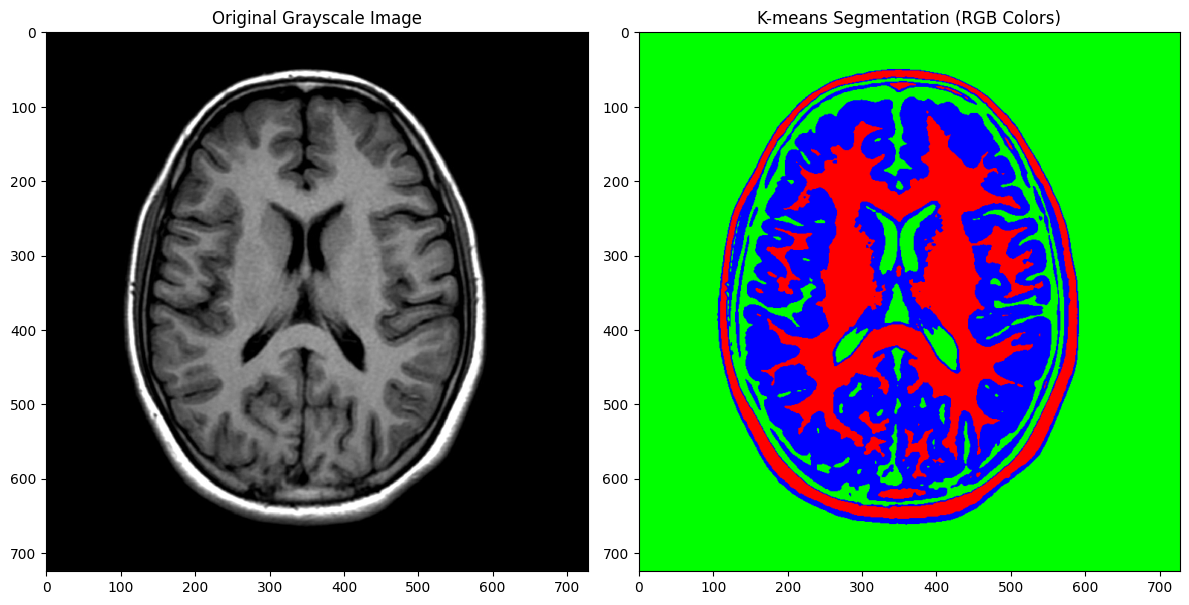

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
img = cv2.imread('C:\\Users\\dillo\\github-classroom\\SSOE-ECE1390\\homework4-DillonHepler\\Homework4\\data\\MRI_brain.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing (Gaussian Blur)
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Step 2: K-means Clustering to segment into 3 tissue types
Z = img_blurred.reshape((-1, 1))
Z = np.float32(Z)

# Define criteria and apply k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # We want to segment into 3 major regions
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels to match the image dimensions
segmented_image = labels.reshape((img.shape))

# Map the clusters to RGB colors: red, green, blue
color_map = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)
color_map[segmented_image == 0] = [255, 0, 0]   # Red
color_map[segmented_image == 1] = [0, 255, 0]   # Green
color_map[segmented_image == 2] = [0, 0, 255]   # Blue

# Display the original and segmented results
plt.figure(figsize=(12, 6))

plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Original Grayscale Image')
plt.subplot(122); plt.imshow(color_map); plt.title('K-means Segmentation (RGB Colors)')

plt.tight_layout()
plt.show()

## Problem 2.
Digital segmentation methods have been widely used in medical pathology to automate methods that used to be done by hand.  One example of this is counting the number of cells in an image.  In this problem, you will use the image of red blood cells.  Design a segmentation approach similar to the demo using contours to attempt to count the number of cells in the image.    


Image credit ShutterStock

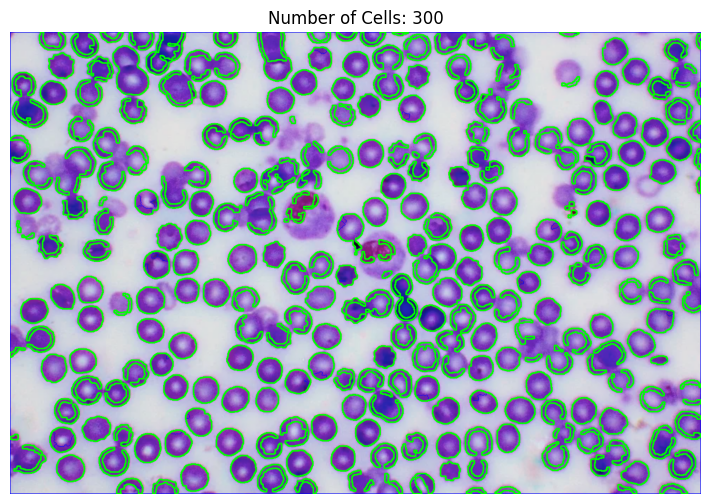

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(os.path.relpath('data/CellCounting.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale for segmentation
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (15, 15), 0)


binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological operations to clean up the image (remove small noise and gaps)
kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# Use the distance transform to help separate connected objects
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Dilate the sure foreground to make the sure background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

# Marker labelling for watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0


markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Find contours again after watershed
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area to ignore small noise
min_area = 100  # Increase min_area based on observation
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw contours on the original image
contour_img = img.copy()
cv2.drawContours(contour_img, filtered_contours, -1, (0, 255, 0), 2)

# Count the number of filtered contours (which represent the cells)
num_cells = len(filtered_contours)

# Display the image with contours and show the cell count
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title(f'Number of Cells: {num_cells}')
plt.axis('off')
plt.show()


## Problem 3
Use the K-means segmetation method based on RGB colors to try to seperate the CitySkyline image into several components.  Play around with the number of clusters and show at least three images with different parameters.


Image source: https://pxhere.com/en/photo/705594 (Image of Minneapolis, MN)


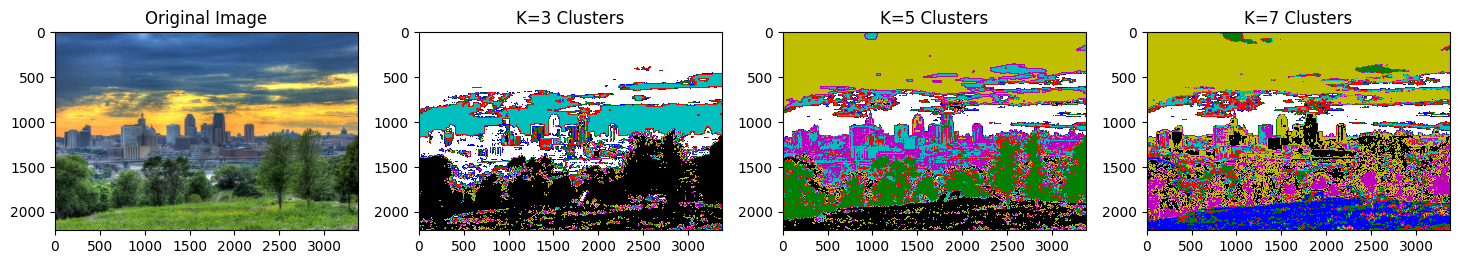

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
img = cv2.imread(os.path.relpath('data/CitySkyline.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Reshape the image into a 2D array of pixels
im_vector = img.reshape((-1, 3))
im_vector = np.float32(im_vector)

# Define criteria, number of clusters(K) and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Cluster 1: K=3
K1 = 3
compactness1, label1, center1 = cv2.kmeans(im_vector, K1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label1 = label1.reshape((img.shape[0], img.shape[1]))

# Cluster 2: K=5
K2 = 5
compactness2, label2, center2 = cv2.kmeans(im_vector, K2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label2 = label2.reshape((img.shape[0], img.shape[1]))

# Cluster 3: K=7
K3 = 7
compactness3, label3, center3 = cv2.kmeans(im_vector, K3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label3 = label3.reshape((img.shape[0], img.shape[1]))

# Plot the original and segmented images
colorcube_cmap = ListedColormap(['w','b','g','r','c','m','y','k'])

plt.figure(figsize=[18, 5])
plt.subplot(141); plt.imshow(img); plt.title("Original Image") 
plt.subplot(142); plt.imshow(label1, cmap=colorcube_cmap); plt.title(f"K={K1} Clusters") 
plt.subplot(143); plt.imshow(label2, cmap=colorcube_cmap); plt.title(f"K={K2} Clusters") 
plt.subplot(144); plt.imshow(label3, cmap=colorcube_cmap); plt.title(f"K={K3} Clusters") 

plt.show()

## Problem 4
Following the example from class of using the openCV BackgroundSubtractor modules with video 
from a web camera, implement a similar while-loop to grab video frames and apply the background subtraction  method to 
mask the video.

* Demonstrate the use of the three versions of this method in openCV    

*       cv2.createBackgroundSubtractorMOG()
*       cv2.createBackgroundSubtractorMOG2()
*       cv2.createBackgroundSubtractorGMG()

For ECE2390 students

* Examine how at least two of the parameters (such as number of gaussian clusters or the 'history' parameter ).  
Note your observations in comments in the code.



In [5]:
import cv2
import numpy as np

# Initialize the three background subtractors
mog_subtractor = cv2.bgsegm.createBackgroundSubtractorMOG()  # MOG
mog2_subtractor = cv2.createBackgroundSubtractorMOG2()  # MOG2
gmg_subtractor = cv2.bgsegm.createBackgroundSubtractorGMG()  # GMG

kernel = np.ones((3, 3), np.uint8)

alive = True

# Create window names for different methods
win_mog = "MOG Background Subtraction"
win_mog2 = "MOG2 Background Subtraction"
win_gmg = "GMG Background Subtraction"

cv2.namedWindow(win_mog, cv2.WINDOW_NORMAL)
cv2.namedWindow(win_mog2, cv2.WINDOW_NORMAL)
cv2.namedWindow(win_gmg, cv2.WINDOW_NORMAL)

# Open the video capture
source = cv2.VideoCapture(0)

while alive:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv2.flip(frame, 1)

    # Apply background subtractors on each frame
    fgmask_mog = mog_subtractor.apply(frame)
    fgmask_mog2 = mog2_subtractor.apply(frame)
    fgmask_gmg = gmg_subtractor.apply(frame)

    # Morphological operations to clean the mask
    fgmask_mog = cv2.morphologyEx(fgmask_mog, cv2.MORPH_CLOSE, kernel, iterations=2)
    fgmask_mog2 = cv2.morphologyEx(fgmask_mog2, cv2.MORPH_CLOSE, kernel, iterations=2)
    fgmask_gmg = cv2.morphologyEx(fgmask_gmg, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Use the masks to remove the background
    frame_mog = frame.copy()
    frame_mog[:, :, 0] = frame[:, :, 0] * fgmask_mog
    frame_mog[:, :, 1] = frame[:, :, 1] * fgmask_mog
    frame_mog[:, :, 2] = frame[:, :, 2] * fgmask_mog

    frame_mog2 = frame.copy()
    frame_mog2[:, :, 0] = frame[:, :, 0] * fgmask_mog2
    frame_mog2[:, :, 1] = frame[:, :, 1] * fgmask_mog2
    frame_mog2[:, :, 2] = frame[:, :, 2] * fgmask_mog2

    frame_gmg = frame.copy()
    frame_gmg[:, :, 0] = frame[:, :, 0] * fgmask_gmg
    frame_gmg[:, :, 1] = frame[:, :, 1] * fgmask_gmg
    frame_gmg[:, :, 2] = frame[:, :, 2] * fgmask_gmg

    # Show the results
    cv2.imshow(win_mog, frame_mog)
    cv2.imshow(win_mog2, frame_mog2)
    cv2.imshow(win_gmg, frame_gmg)

    # Exit on 'q' or 'ESC' key
    key = cv2.waitKey(1)
    if key == ord("Q") or key == ord("q") or key == 27:
        alive = False

# Release the video capture and close windows
source.release()
cv2.destroyAllWindows()
